In [1]:
#Stock Price Prediction using recurrent nueral network called Long Term Short Memory(LSTM)

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from  keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
#getting the data
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932


In [5]:
#Get the noof rows and columns
df.shape

(2003, 6)

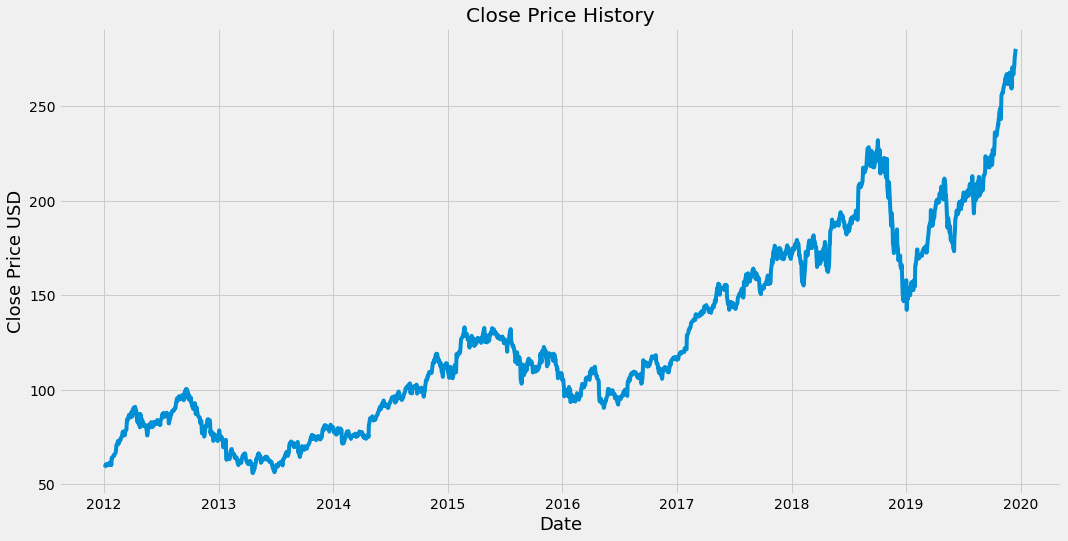

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.show()


In [7]:
#Create a new dataframe with CLose column
data = df.filter(['Close'])

#convert df into numpy arrays

dataset = data.values

training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1603

In [8]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [11]:
#create the training data set

train_data = scaled_data[0:training_data_len , :]
#split data into x_train and y_train
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()



[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [12]:
#convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [14]:
#Reshape the data as LSTM model requires 3 dimensional input
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [16]:
#Build the model

model =Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 33s 21ms/step - loss: 6.2221e-04


In [24]:
#create the testing data_set
#Create a new array containing scaled values from index 1543 to 2003

test_data =scaled_data[training_data_len-60: ,:]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [25]:
#convert the data to numpy array
x_test = np.array(x_test)

In [26]:
#Reshape the test data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(400, 60, 1)

In [27]:
#Get the model's predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [28]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.328002052307129

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


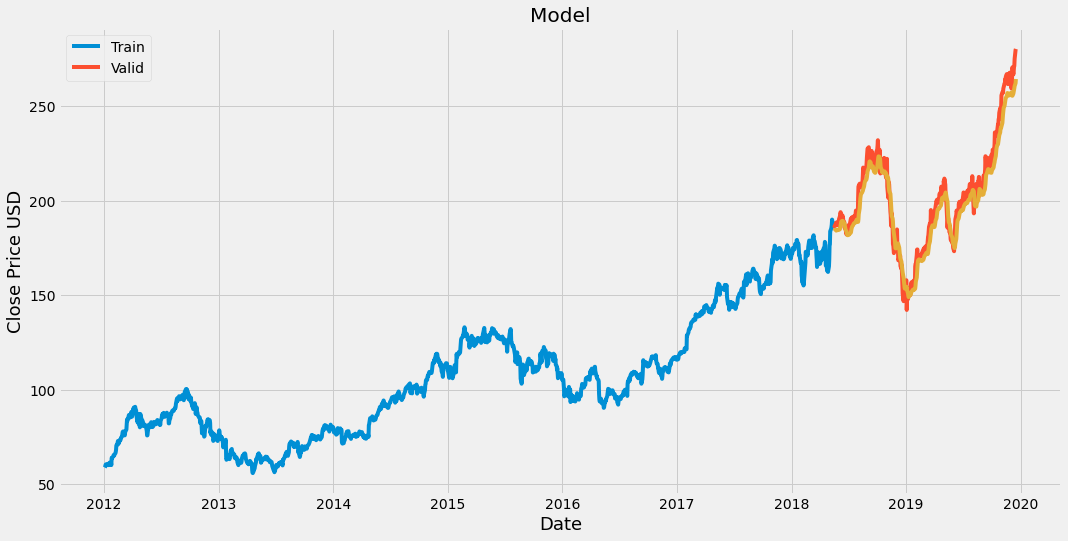

In [29]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Valid'])
plt.show()


In [30]:
#Displaying the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,185.361404
2018-05-18,186.309998,185.126389
2018-05-21,187.630005,184.686127
2018-05-22,187.160004,184.427505
2018-05-23,188.360001,184.212082
...,...,...
2019-12-11,270.769989,258.508118
2019-12-12,271.459991,259.613159
2019-12-13,275.149994,260.727966


In [ ]:
#Getting the quote

apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')

new_df = apple_quote.filter(['Close'])

#Last 60 days of closing price values
last_60_days = new_df[-60:0].values

#Scale
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
#append the last 60 days
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[1],1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scale
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)